**Quantum Walk Search Algorithm**

Quantum walks are the quantum equivalent of the classical Markov chain. Due to superposition, a quantum walk will take all possible paths simultaneously until we measure the circuit. Due to quantum interference, some state will cancel out. This makes quantum walk algorithms faster than classical ones, since we can design them in such way that wrong answers quickly cancells out. There are two common models for quantum walks, coined quantum walks and Szegedy quantum walks, which are equivalent under certain circumstances. A coined quantum walk is a walk on the vertices of the graph while Szegedy quantum walk takes place on the edges.

A simple example of a coined quantum walk is a walk on the infinite integer line. In this case, we represent the walker's position with an integer,  
{
|
j
⟩
:
j
∈
Z
}
 , since the walker can walk all integers in  
Z
 . A coin decides how the walker should move. On the integer line, the walker can go either left or right. Therefore, the coin's computational basis is  
{
|
0
⟩
,
|
1
⟩
}
 , and we move the walker in one direction if the coin is  
|
0
⟩
  and in the other direction if the coin is  
|
1
⟩
 .

A coined quantum is a walk on the nodes in a graph, and we refer to the nodes as states. The walker can move between states that are connected with an edge. In the coin model, we have two quantum states and two operators. The first state is the position state, which represents the walker's position. For the walk above, this is an integer since the walker can be anywhere on the integer line. The other state is the coin state. The coin state decides how the walker should move in the next step. We can represent both the coin state and the position state by vectors in Hilbert space. If we can express the coin state by a vector in  
H
C
  and the position state with a vector in  
H
P
 , we can express the quantum space for the entire walker as  
H
=
H
C
⊗
H
P
 .
 
 the model also has two operators; the coin operator,  
C
 , and the shift operator,  
S
 . The coin operator acts on  
H
C
  during each time step and puts the walker in superposition, so it walks all possible paths simultaneously. For the walk on the integer line, this means that it moves both to the left and right in each time step. There are different coin operators, but the most common ones are the Hadamard coin and the Grover coin. A Hadamard coin is a Hadamard gate that puts the walker in an equal superposition:

H
=
1
√
2
[
1
1
1
−
1
]

The other operator in the model, the shift operator, acts on  
H
P
  and moves the walker to the next position. For the walk on the integer line, the shift operator moves the walker to the left of the coin is  
|
0
⟩
  and to the right if the coin is  
|
1
⟩
 :

S
|
0
⟩
|
j
⟩
=
|
0
⟩
|
j
+
1
⟩
 
S
|
1
⟩
|
j
⟩
=
|
1
⟩
|
j
−
1
⟩
 
With the shift operator defined as above, we can represent one step of the coined quantum as the unitary operator  
U
  given by
U
=
S
C
,
 
where C is the coin operator. For the quantum walk on the integer line we use the Hadamard coin, but C can be either Hadamard coin, Grover coin or any other coin operator.

We can also look several steps ahead. We can express the quantum state  
|
ψ
⟩
  after  
t
  time steps as
|
ψ
(
t
)
⟩
=
U
t
|
ψ
(
0
)
⟩
,
 
where  
|
ψ
(
0
)
⟩
  is the initial state and U is the operator for one step of the walk.

Coined quantum walks are most suitable for regular graphs, graphs where all nodes have the same number of neighbors. An alternative quantum walk model that is more convenient for non-regular graphs is the Szegedy model

In [2]:
## we will try to attempt quantum walk on a HYPERCUBE and follow Hamming distance
## representation of nodes of N-dimensional hypercube will be done using N-binary tuple[1]
## Grover coin will be used[2]

[1]  The binary representation of the neighbors of a node will differ by only one binary number. For example, in the 4-dimensional hypercube, the neighbors to  
0000
  are  
0001
 ,  
0010
 ,  
0100
 , and  
1000
 . Thus, a node is connected to all nodes to which the Hamming distance is 1. 


[2]  A Grover coin is the Grover diffusion operator from Grover's algorithm. We define it as

G
=
⎡
⎢
⎢
⎢
⎢
⎢
⎢
⎣
2
n
−
1
2
n
…
2
n
2
n
2
n
−
1
…
2
n
⋮
⋮
⋱
⋮
2
n
2
n
…
2
n
−
1
⎤
⎥
⎥
⎥
⎥
⎥
⎥
⎦
 
Like the Hadamard coin, a Grover coin puts the walker in superposition. However, it behaves a bit differently. If we apply a Grover coin to a walker in position  
|
000
⟩
 , we obtain the state vector probabilities and the coin does not put the walker in an equal superposition as the Hadamard coin does. Instead,  
|
000
⟩
  has a much larger probability than the other states.

In [3]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, execute, Aer, IBMQ, QuantumRegister, ClassicalRegister
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.circuit.library import QFT
from numpy import pi
from qiskit.quantum_info import Statevector
from matplotlib import pyplot as plt
import numpy as np
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

we construct a 4D hypercube therefore 4+2=6 6 states in our QC.

2 states for our coin.

Grover coin is the diffuser in Grovers Algorithm .
https://github.com/ceyxasm/qc_implementations/blob/main/Grovers_algo.ipynb

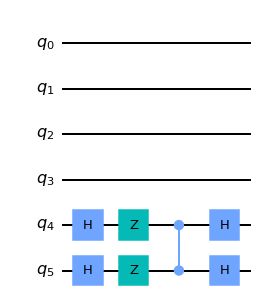

In [5]:
one_step_circuit = QuantumCircuit(6, name=' ONE STEP') 
# Coin operator from qiskit
one_step_circuit.h([4,5])
one_step_circuit.z([4,5])
one_step_circuit.cz(4,5)
one_step_circuit.h([4,5])
one_step_circuit.draw() 

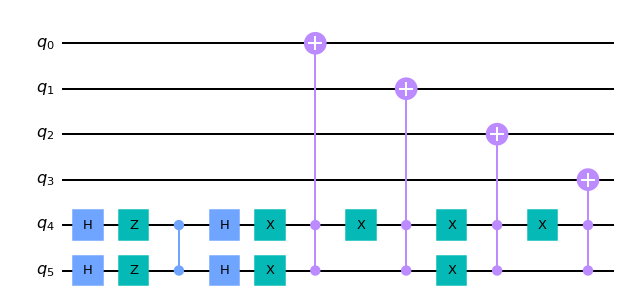

In [6]:
# Shift operator function for 4d-hypercube
def shift_operator(circuit):
    for i in range(0,4):
        circuit.x(4)
        if i%2==0:
            circuit.x(5)
        circuit.ccx(4,5,i)

shift_operator(one_step_circuit)

one_step_gate = one_step_circuit.to_instruction() 
one_step_circuit.draw() 

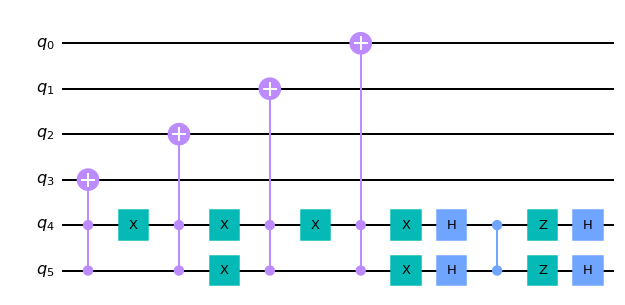

In [7]:
## For this algorithm we will need to use the inverse of the one step gate implemented earlier. 
## We get this by using the built in circuit function inverse().
one_step_circuit.inverse().draw() 

In [8]:
# Make controlled gates
inv_cont_one_step = one_step_circuit.inverse().control()
inv_cont_one_step_gate = inv_cont_one_step.to_instruction()
cont_one_step = one_step_circuit.control()
cont_one_step_gate = cont_one_step.to_instruction()

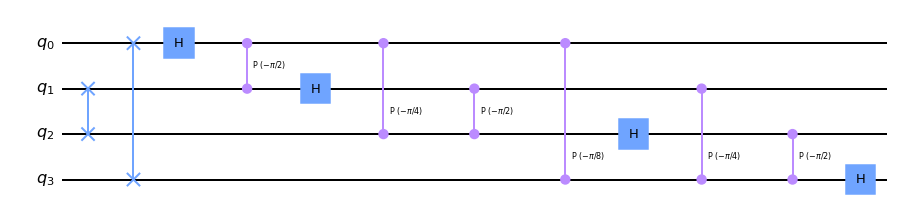

In [9]:
## Both the controlled one step gate and the controlled inversed 
## one step gate will be used in the phase estimation.
## Another thing we will use in the phase estimation is the Quantum Fourier Transform.

inv_qft_gate = QFT(4, inverse=True).to_instruction()  
qft_gate = QFT(4, inverse=False).to_instruction()

QFT(4, inverse=True).decompose().draw("mpl")

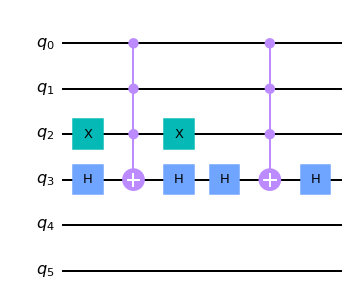

In [10]:
## creating phase ORACLE
phase_circuit =  QuantumCircuit(6, name=' phase oracle ')
# Mark 1011
phase_circuit.x(2)
phase_circuit.h(3)
phase_circuit.mct([0,1,2], 3)
phase_circuit.h(3)
phase_circuit.x(2)
# Mark 1111
phase_circuit.h(3)
phase_circuit.mct([0,1,2],3)
phase_circuit.h(3)
phase_oracle_gate = phase_circuit.to_instruction()
# Phase oracle circuit
phase_oracle_circuit =  QuantumCircuit(11, name=' PHASE ORACLE CIRCUIT ')
phase_oracle_circuit.append(phase_oracle_gate, [4,5,6,7,8,9])
phase_circuit.draw() 

We will now implement a gate that rotates an auxiliary qubit if the other qubits are non-zero. We will use this gate in the phase estimation, where it will rotate the auxiliary qubit if  
θ
≠
0
 .

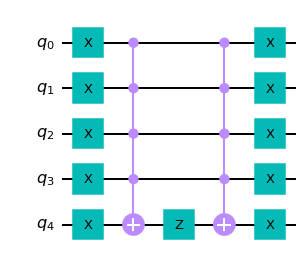

In [11]:
# Mark q_4 if the other qubits are non-zero 
mark_auxiliary_circuit = QuantumCircuit(5, name=' mark auxiliary ')
mark_auxiliary_circuit.x([0,1,2,3,4])
mark_auxiliary_circuit.mct([0,1,2,3], 4)
mark_auxiliary_circuit.z(4)
mark_auxiliary_circuit.mct([0,1,2,3], 4)
mark_auxiliary_circuit.x([0,1,2,3,4])

mark_auxiliary_gate = mark_auxiliary_circuit.to_instruction()
mark_auxiliary_circuit.draw()

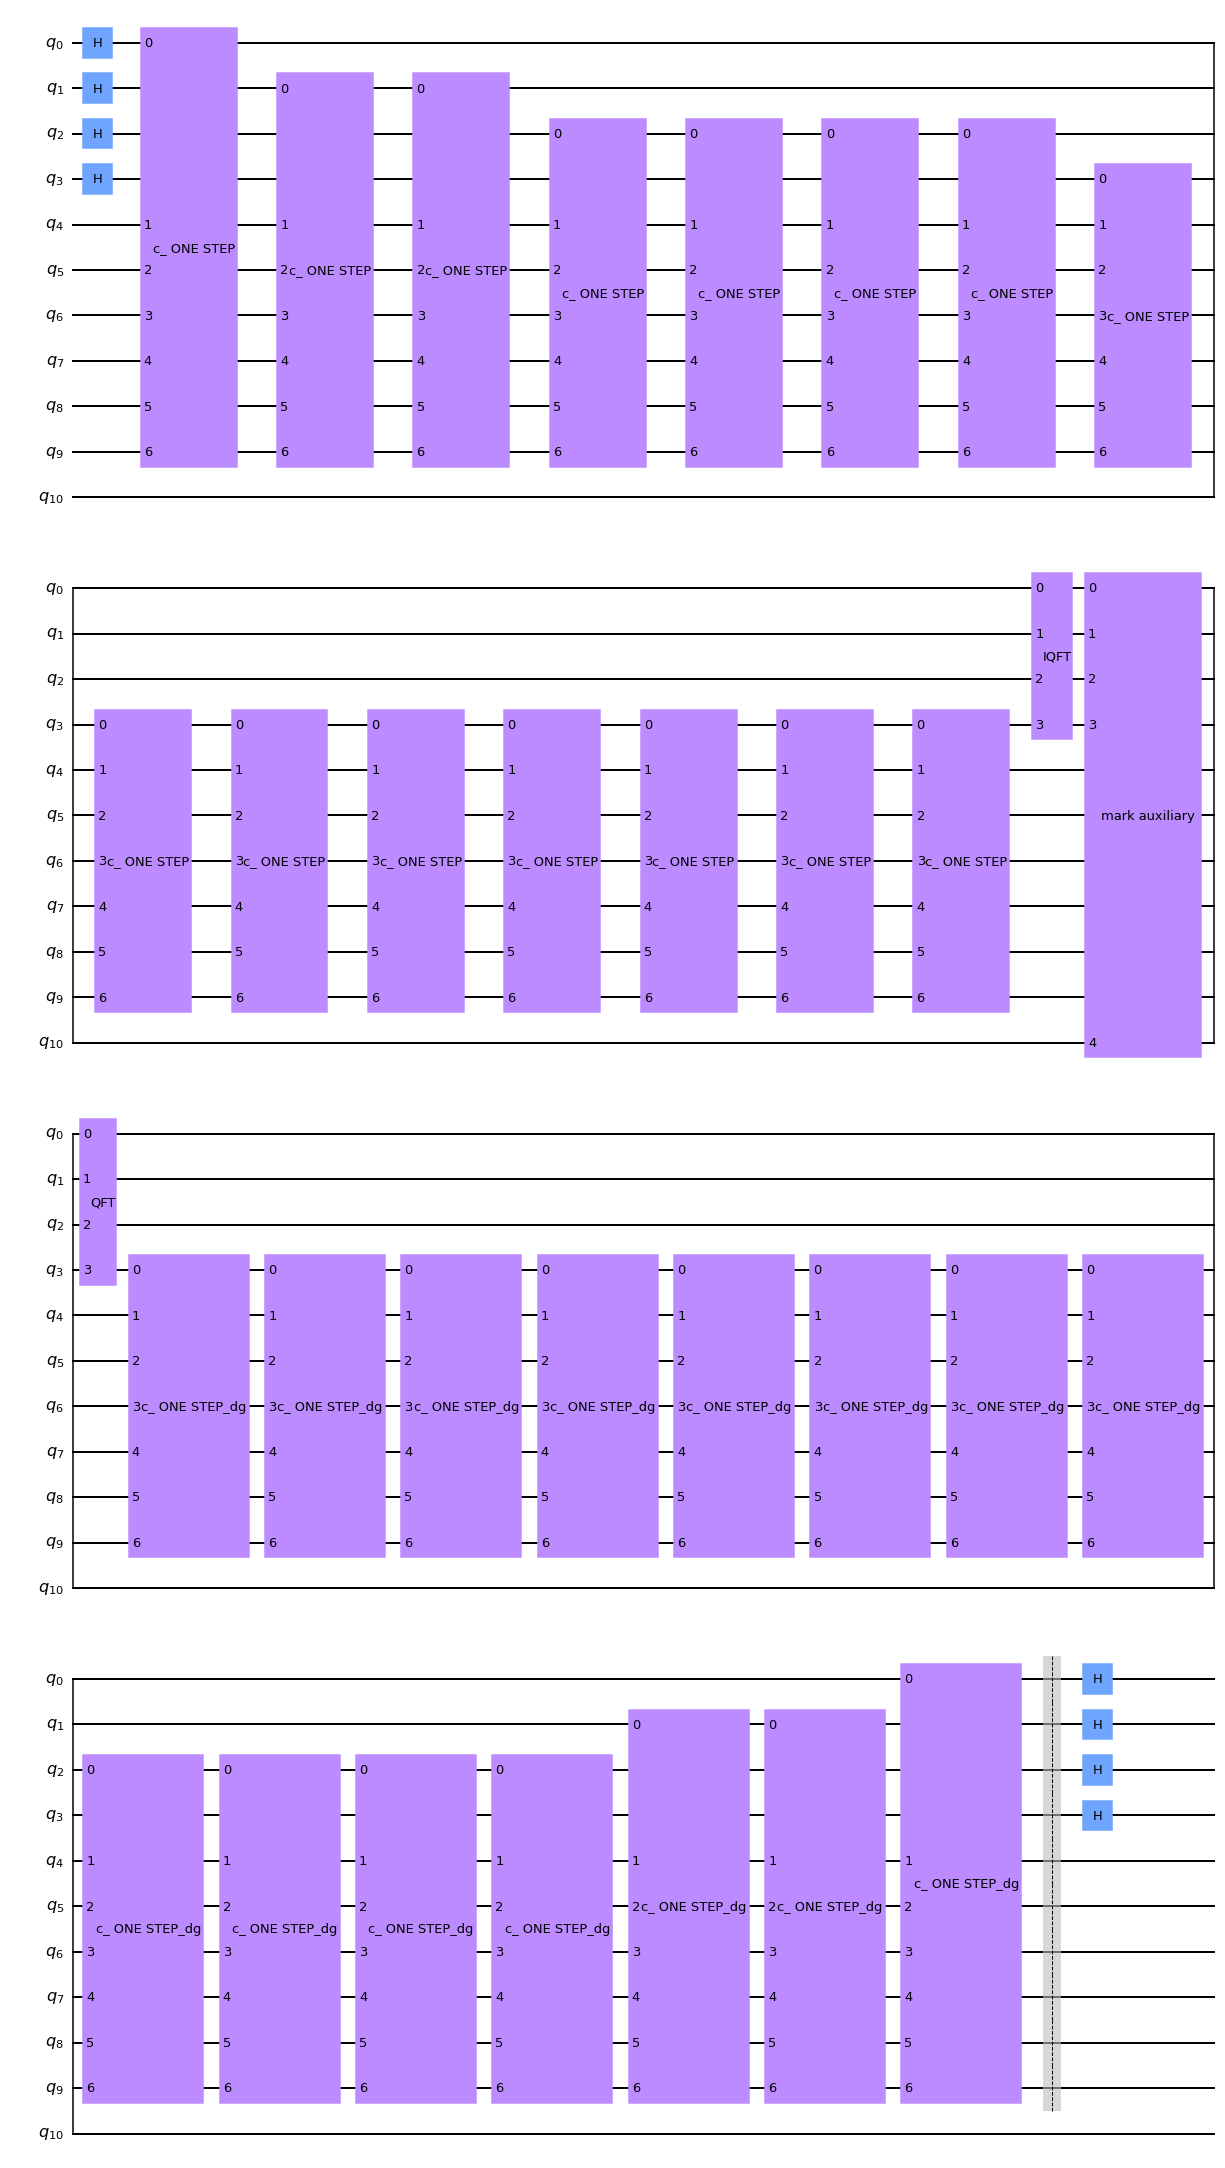

In [12]:
# Phase estimation
phase_estimation_circuit = QuantumCircuit(11, name=' phase estimation ')
phase_estimation_circuit.h([0,1,2,3])
for i in range(0,4):
    stop = 2**i
    for j in range(0,stop):
        phase_estimation_circuit.append(cont_one_step, [i,4,5,6,7,8,9])

# Inverse fourier transform
phase_estimation_circuit.append(inv_qft_gate, [0,1,2,3])

# Mark all angles theta that are not 0 with an auxiliary qubit
phase_estimation_circuit.append(mark_auxiliary_gate, [0,1,2,3,10])

# Reverse phase estimation
phase_estimation_circuit.append(qft_gate, [0,1,2,3])   

for i in range(3,-1,-1):
    stop = 2**i
    for j in range(0,stop):
        phase_estimation_circuit.append(inv_cont_one_step, [i,4,5,6,7,8,9])
phase_estimation_circuit.barrier(range(0,10))
phase_estimation_circuit.h([0,1,2,3])

# Make phase estimation gate
phase_estimation_gate = phase_estimation_circuit.to_instruction()
phase_estimation_circuit.draw() 

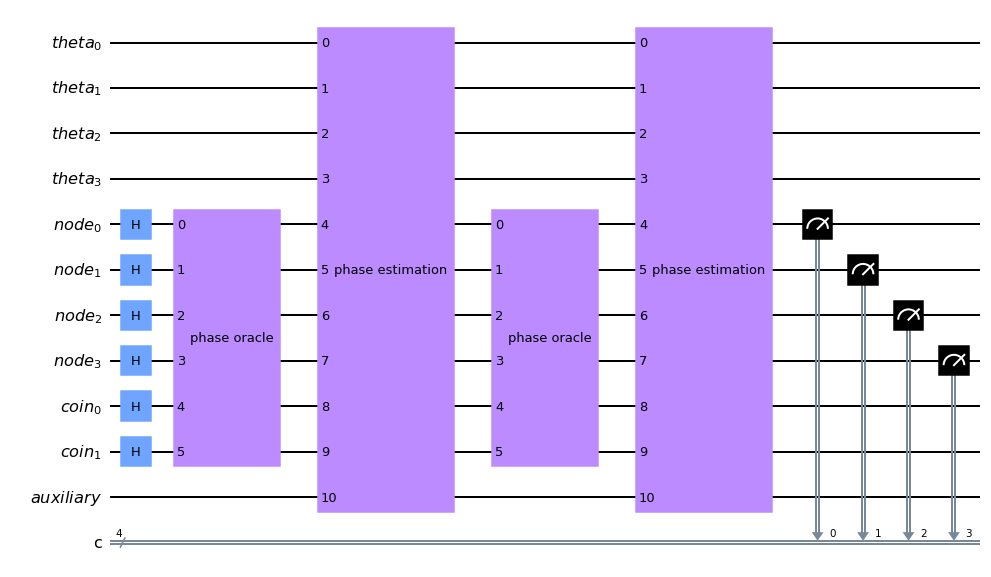

In [13]:
# Implementation of the full quantum walk search algorithm
theta_q = QuantumRegister(4, 'theta')
node_q = QuantumRegister(4, 'node')
coin_q = QuantumRegister(2, 'coin')
auxiliary_q = QuantumRegister(1, 'auxiliary')
creg_c2 = ClassicalRegister(4, 'c')
circuit = QuantumCircuit(theta_q, node_q, coin_q, auxiliary_q, creg_c2)
# Apply Hadamard gates to the qubits that represent the nodes and the coin
circuit.h([4,5,6,7,8,9])
iterations = 2

for i in range(0,iterations):
    circuit.append(phase_oracle_gate, [4,5,6,7,8,9])
    circuit.append(phase_estimation_gate, [0,1,2,3,4,5,6,7,8,9,10])

circuit.measure(node_q[0], creg_c2[0])
circuit.measure(node_q[1], creg_c2[1])
circuit.measure(node_q[2], creg_c2[2])
circuit.measure(node_q[3], creg_c2[3])
circuit.draw()

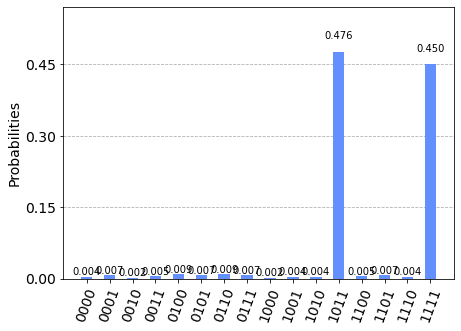

In [14]:
## implementing on QASM simulator
backend = Aer.get_backend('qasm_simulator') 
job = execute( circuit, backend, shots=1024 ) 
hist = job.result().get_counts() 
plot_histogram( hist )

In [15]:
## failed to run on actual hardware